# Лабораторные по Методам оптимизации

In [15]:
# используемые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Лабораторная номер 1

Задание:     
+ Для функции $f(x) = x+2\sqrt{x}$ найти интервалы монотонности        
+ Для функции $f(x) = x^4+2x^2+4x+1$ найти экстремумы в интервале [-1,0] с точностью $\epsilon=0.002$

In [16]:
def plot(x1,x2, func,l):
    xSpace = np.linspace(x1,x2,500)
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.axvline(0, color='black', linewidth='0.8')
    plt.axhline(0, color='black', linewidth='0.8')
    plt.grid(True, linestyle='--',linewidth='0.5')
    plt.plot(xSpace, func(xSpace), label=l)
    plt.legend()

In [17]:
def derivative(func, x, h=0.00001):
    return (func(x + h) - func(x - h)) / (2 * h)

In [18]:
def dichotomyMethod(x1,x2,func,delta):
    mode = 1 if derivative(func,(x1+x2)/2) > 0 else -1
    deltaM= 2*delta #deltaMultiply типа 2 же умножается на дельту
    deltaD = delta*0.5 #deltaDivine тип дельта же делится на 2 по сути
    while np.abs(x2-x1) > deltaM:
        b = (x2+x1)/2 + deltaD
        a = (x2+x1)/2 - deltaD
        if mode * func(a) < mode * func(b):
            x2 = b
        else: 
            x1 = a 
    return (x1+x2)/2
""" Поиск экстремума функции Методом половинного деления (дихотомии,бисекции) 
mode=1 находит минимум на интервале, mode=-1 максимум """

' Поиск экстремума функции Методом половинного деления (дихотомии,бисекции) \nmode=1 находит минимум на интервале, mode=-1 максимум '

In [19]:
def bisecktionMethod(x1,x2,func,delta):
    delta = 2*delta
    while np.abs(x2-x1) > delta:
        x0 = (x2+x1)/2
        if x0 == 0:
            return x0 
        if func(x0)*func(x2) < 0: 
            x1 = x0 
        else:
            x2 = x0 
    return (x2+x1)/2
""" Метод половинного деления только для поиска корня """
# это в задание не входило, так чисто для себя

' Метод половинного деления только для поиска корня '

In [20]:
def analize(func):
    # нахождение производной
    x = sp.symbols('x')
    f = func(x)
    df = sp.diff(f, x)
    print(f"Производная {df} Функции {f}")
    equation = sp.Eq(df, 0)
    solution = sp.solve(equation, x)
    solution = [point.evalf() for point in solution if point.is_real]
    # solution содержит все экстремумы 
    intervals = sorted(solution + [-sp.oo,sp.oo]) if len(solution) != 0 else [0, sp.oo]
    print(f"Ось: {intervals}")
    mono_intervals = []
    
    for i in range(len(intervals)-1):
        midpoint = (intervals[i] + intervals[i + 1]) / 2
        derivative_value = (df.subs(x, midpoint)).evalf()
        interval = [intervals[i], intervals[i + 1]]

        if derivative_value > 0:
            mono_intervals.append((interval, "Возрастает"))
        elif derivative_value < 0:
            mono_intervals.append((interval, "Убывает"))
        else:
            mono_intervals.append((interval, "Плоско как на равнине"))

    
    print(f"Интервалы монотонности: {mono_intervals}")


    


Производная 1 + 1/sqrt(x) Функции 2*sqrt(x) + x
Ось: [0, oo]
Интервалы монотонности: [([0, oo], 'Возрастает')]
Экстремум функции в 0.0019746093750000002 со значением 0.09084776336426721
Производная 4*x**3 + 4*x + 4 Функции x**4 + 2*x**2 + 4*x + 1
Ось: [-oo, -0.682327803828019, oo]
Интервалы монотонности: [([-oo, -0.682327803828019], 'Убывает'), ([-0.682327803828019, oo], 'Возрастает')]
Экстремум функции в -0.682251953125 со значением -0.5814121520303155


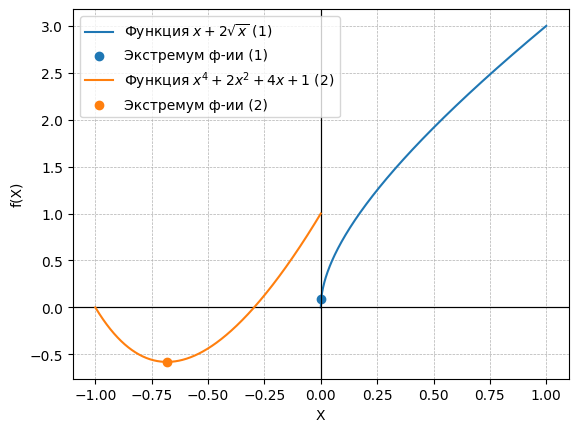

In [21]:
x = sp.symbols('x')
f1_sp = lambda x: x + 2 * sp.sqrt(x)
f1_np = lambda x: x + 2 * np.sqrt(x)
f2 = lambda x: x**4 + 2*x**2 + 4*x + 1
a1, b1 = 0, 1
a2, b2 = -1, 0
epsilon = 0.002

analize(f1_sp)
plot(a1,b1,f1_np,l=r"Функция $x + 2\sqrt{x}$ (1)")
x = dichotomyMethod(a1,b1,f1_np,epsilon)
plt.scatter(x,f1_np(x), label="Экстремум ф-ии (1)")
print(f"Экстремум функции в {x} со значением {f1_np(x)}")

analize(f2)
plot(a2,b2,f2,l=r"Функция $x^4+2x^2+4x+1$ (2)")
x = dichotomyMethod(a2,b2,f2,epsilon)
plt.scatter(x,f2(x), label="Экстремум ф-ии (2)")
print(f"Экстремум функции в {x} со значением {f2(x)}")
plt.legend()

## Лабораторная номер 2